In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [2]:
topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
react=pd.read_csv('data/reactSampleCommits.csv', sep=",")

## Data Info

In [3]:
commits.head(3)

,owner,repo,lastUpdated,numCommits,totalTimeToCompute
0,Alexander-MacDonald,test-repo,2023-10-31T23:59:29Z,6,6198.057413
1,twbs,bootstrap,2023-11-02T08:53:09Z,22614,7636.327028
2,EbookFoundation,free-programming-books,2023-11-05T19:16:40Z,9026,7468.326092


In [4]:
commits.shape

(980, 5)

In [5]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owner               980 non-null    object 
 1   repo                980 non-null    object 
 2   lastUpdated         980 non-null    object 
 3   numCommits          980 non-null    int64  
 4   totalTimeToCompute  980 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.4+ KB


In [6]:
commits.isnull().sum()

owner                 0
repo                  0
lastUpdated           0
numCommits            0
totalTimeToCompute    0
dtype: int64

###  Unique data

In [7]:
#'Commits Unique values
unique_value_counts = commits.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

owner                 814
repo                  973
lastUpdated           971
numCommits            898
totalTimeToCompute    980
dtype: int64


## Data Cleaning 

In [8]:
# Converting 'date' column to datetime
react['date'] = pd.to_datetime(react['date'])
react['net_code_change'] = react['additions'] - react['deletions']

# EDA

## commits

In [9]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owner               980 non-null    object 
 1   repo                980 non-null    object 
 2   lastUpdated         980 non-null    object 
 3   numCommits          980 non-null    int64  
 4   totalTimeToCompute  980 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.4+ KB


In [10]:
commits.head(3)

,owner,repo,lastUpdated,numCommits,totalTimeToCompute
0,Alexander-MacDonald,test-repo,2023-10-31T23:59:29Z,6,6198.057413
1,twbs,bootstrap,2023-11-02T08:53:09Z,22614,7636.327028
2,EbookFoundation,free-programming-books,2023-11-05T19:16:40Z,9026,7468.326092


In [11]:
#'Commits Unique values
unique_value_counts = commits.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

owner                 814
repo                  973
lastUpdated           971
numCommits            898
totalTimeToCompute    980
dtype: int64


In [12]:
# Owner Analysis
owner_counts = commits['Owner'].value_counts()
print("Repository count per owner:")
owner_counts 

KeyError: 'Owner'

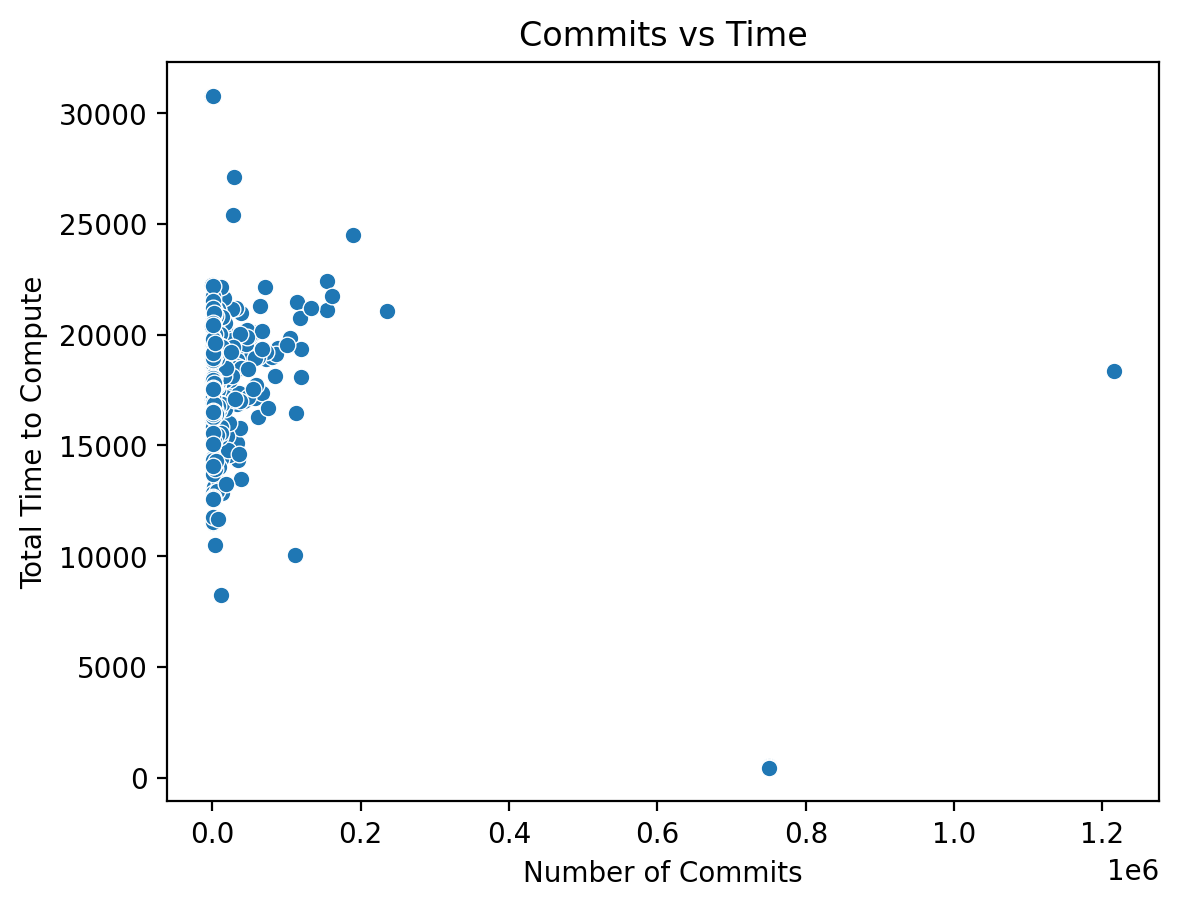

In [ ]:
# Scatter plot for commits vs time
sns.scatterplot(data=commits, x='numCommits', y='totalTimeToCompute')
plt.xlabel('Number of Commits')
plt.ylabel('Total Time to Compute')
plt.title('Commits vs Time')
plt.show()


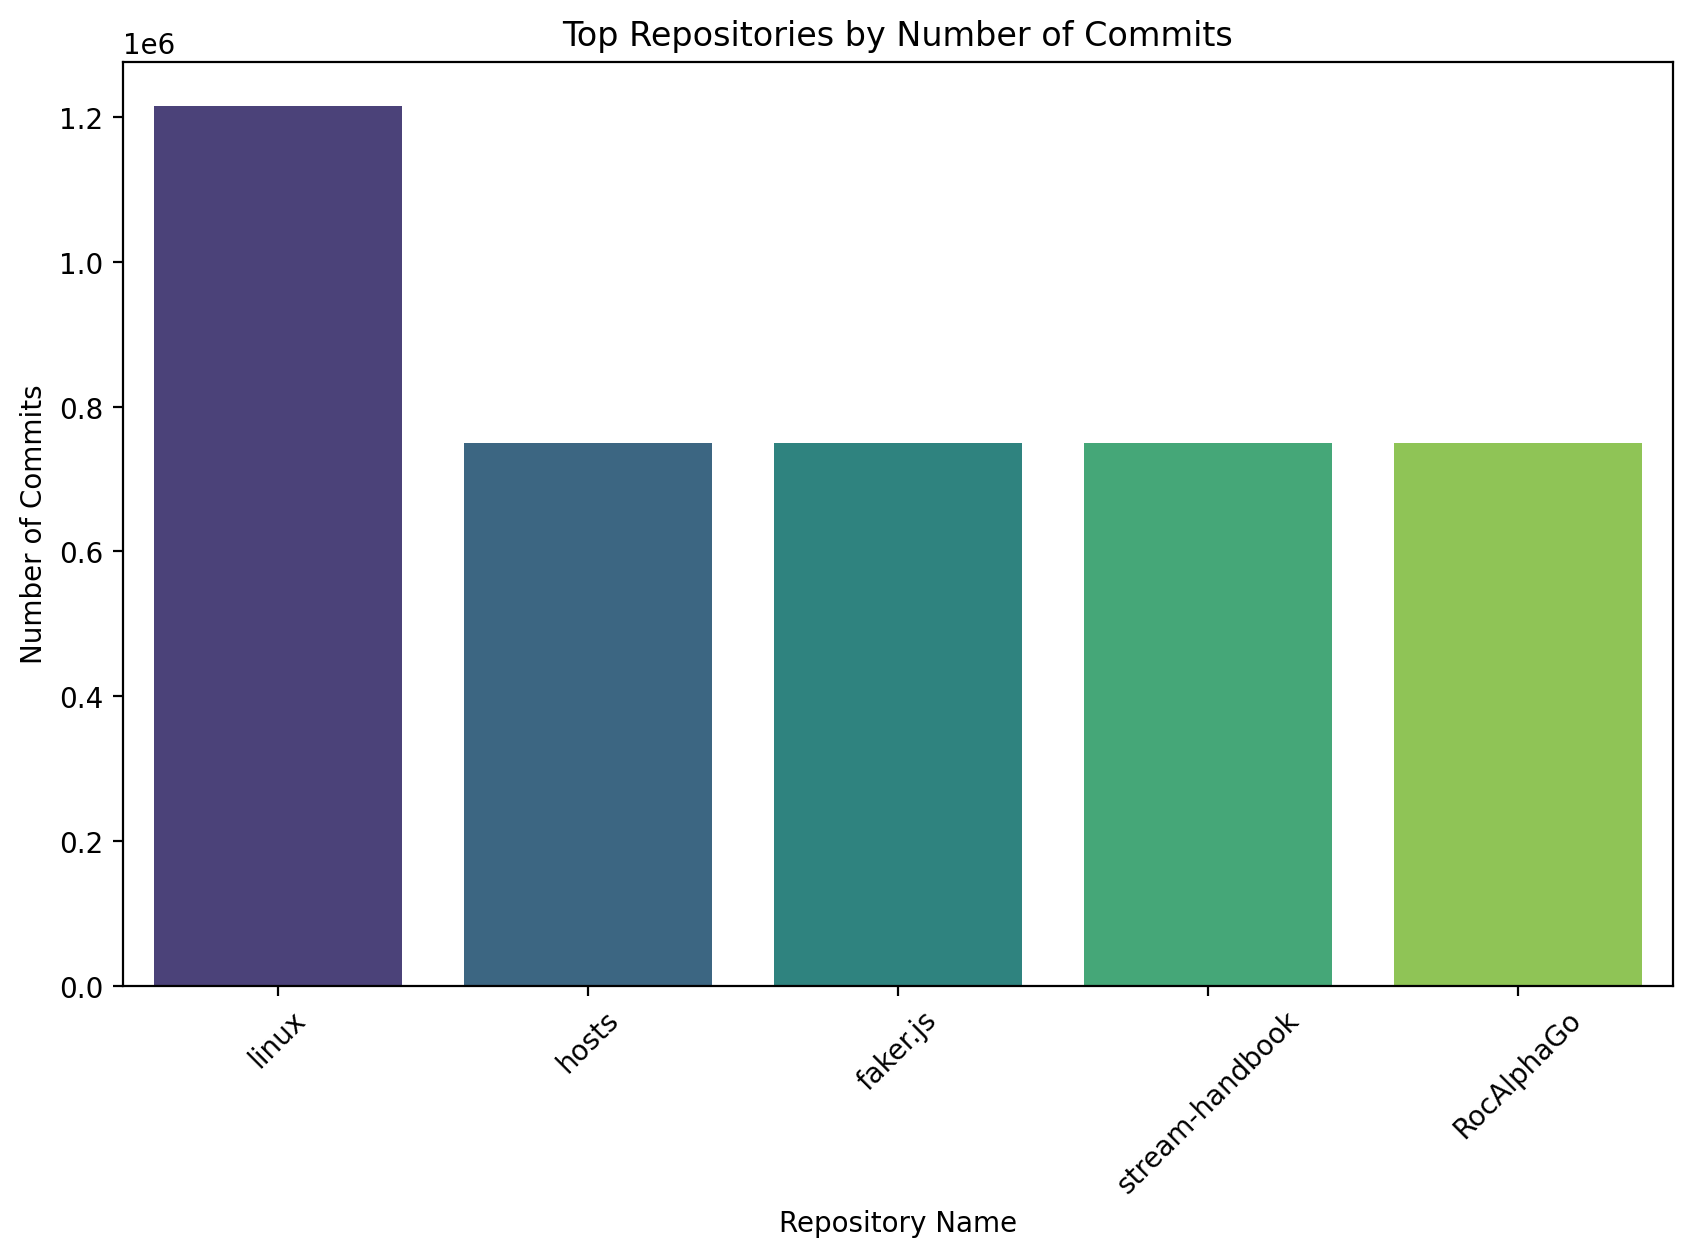

In [ ]:
top_repositories = commits.nlargest(5, 'numCommits')

# Plotting the top repositories by number of commits
plt.figure(figsize=(10, 6))
sns.barplot(data=top_repositories, x='Repository-Name', y='numCommits', palette='viridis')
plt.title('Top Repositories by Number of Commits')
plt.xlabel('Repository Name')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

Text(0.5, 1.0, 'Distribution of Total Time to Compute')

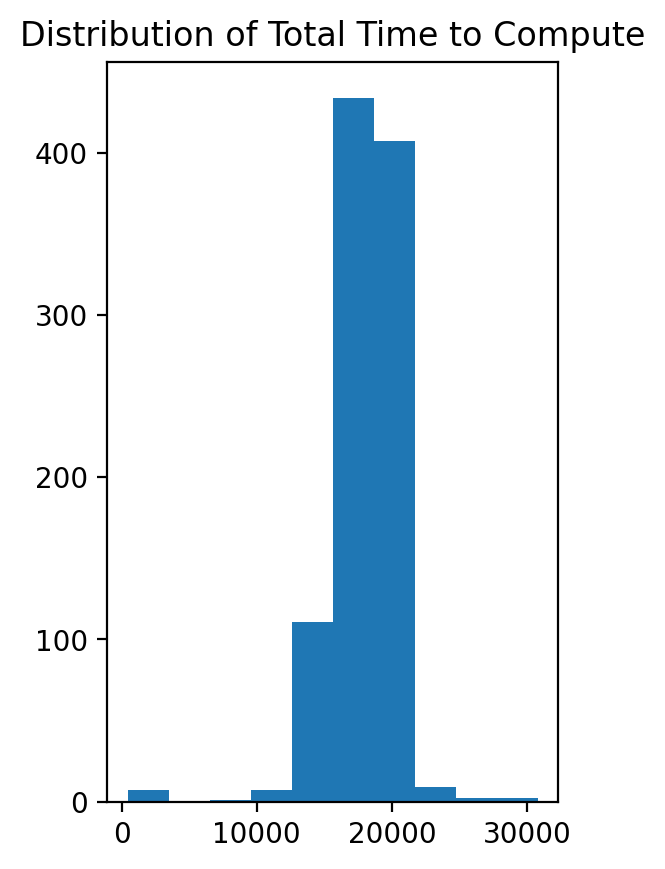

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(commits['totalTimeToCompute'], bins=10)
plt.title('Distribution of Total Time to Compute')
